In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='face_mask.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('face_mask.zip')
f.keys()
!unzip face_mask.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.12.0


In [ ]:
train_dir = '/content/Face Mask Dataset/Train'
validation_dir = '/content/Face Mask Dataset/Validation'
test_dir='/content/Face Mask Dataset/Test'

BATCH_SIZE = 32
IMG_SIZE = (224, 224)
no_classes = 2

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

class_names = train_dataset.class_names
print(class_names)


Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.
['WithMask', 'WithoutMask']


In [ ]:
class_names = train_dataset.class_names

(32, 224, 224, 3)
[0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1]


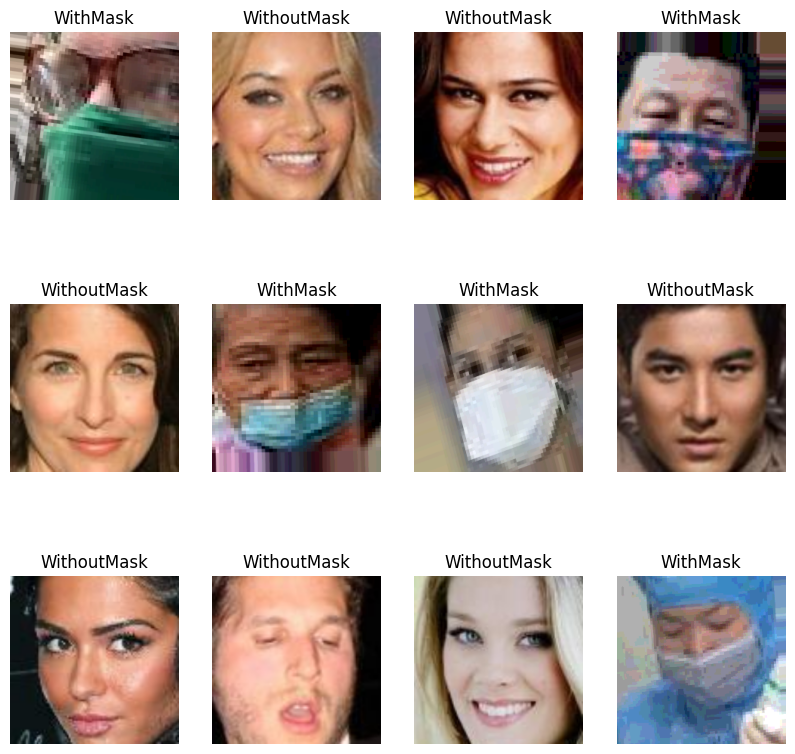

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in train_dataset.take(1):
  print (image_batch.shape)
  print (labels_batch.numpy())
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy ().astype( "uint8" ) )
    plt.title(class_names[labels_batch[i]])
    plt.axis( "off" )

In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.Resizing (224,224)
]
)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential ([
    layers.experimental.preprocessing.RandomFlip( "horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
]
)


In [ ]:
base_model = keras.applications.ResNet50(
    weights=None,  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
nb_classes = 2
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D

x = base_model.layers[-2].output
x = data_augmentation(x)
#x = resize_and_rescale(x)
x = Flatten()(x)

x = Dropout(0.2)(x)
x = keras.layers.Dense(512, activation="relu")(x)

output = Dense(nb_classes, activation="softmax")(x)
model_final = Model(inputs=base_model.input, outputs=output)


In [ ]:
model_final.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
epochs = 50
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model_final.fit(train_dataset, epochs=epochs, validation_data=validation_dataset,callbacks=[early_stopping])

Epoch 1/50
313/313 [==============================] - 163s 350ms/step - loss: 2.7415 - accuracy: 0.8707 - val_loss: 0.1408 - val_accuracy: 0.9550
Epoch 2/50
313/313 [==============================] - 109s 346ms/step - loss: 0.1244 - accuracy: 0.9587 - val_loss: 0.0932 - val_accuracy: 0.9737
Epoch 3/50
313/313 [==============================] - 111s 353ms/step - loss: 0.1031 - accuracy: 0.9649 - val_loss: 0.0894 - val_accuracy: 0.9712
Epoch 4/50
313/313 [==============================] - 111s 353ms/step - loss: 0.0660 - accuracy: 0.9781 - val_loss: 0.0533 - val_accuracy: 0.9825
Epoch 5/50
313/313 [==============================] - 108s 346ms/step - loss: 0.0605 - accuracy: 0.9795 - val_loss: 0.0422 - val_accuracy: 0.9787
Epoch 6/50
313/313 [==============================] - 111s 353ms/step - loss: 0.0553 - accuracy: 0.9803 - val_loss: 0.1272 - val_accuracy: 0.9588
Epoch 7/50
313/313 [==============================] - 109s 345ms/step - loss: 0.0541 - accuracy: 0.9828 - val_loss: 0.0299 -

In [ ]:
scores = model_final.evaluate(test_dataset)

31/31 [==============================] - 4s 95ms/step - loss: 0.1250 - accuracy: 0.9657


1/1 [==============================] - 0s 24ms/step


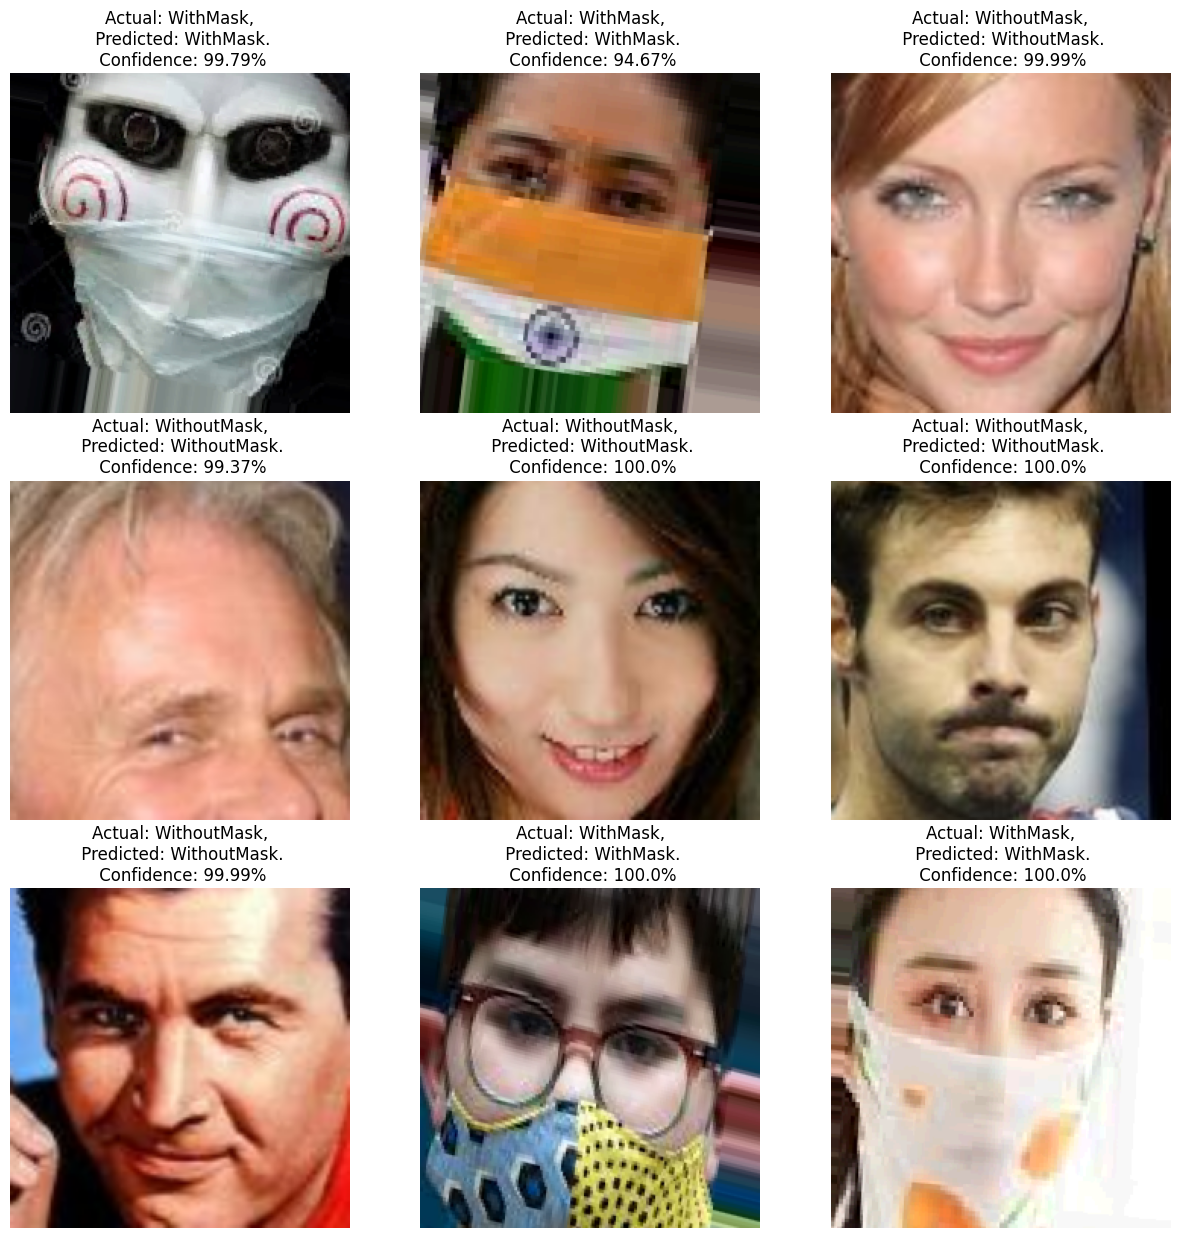

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model_final.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model_final, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

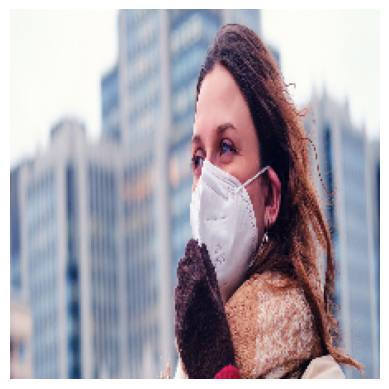

1/1 [==============================] - 0s 41ms/step
Predicted: WithMask. Confidence: 99.25%


In [ ]:
#Test on a Random Picture

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Load a random image
img = tf.keras.preprocessing.image.load_img('/content/Face Mask Dataset/random.jpg', target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction using the model
predicted_class, confidence = predict(model_final, img)
print(f"Predicted: {predicted_class}. Confidence: {confidence}%")
